# Linear Regression with Tips Dataset

In [11]:
# imports session
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Formatação mais bonita para os notebooks
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

### Exploring the Dataset

In [18]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [53]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [54]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


### Generanting Model and Training

In [55]:
def get_reg(X,y):
    reg = LinearRegression()
    reg.fit(X,y)
    return reg

In [26]:
X = tips['total_bill'].values.reshape(-1, 1)
y = tips['tip'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = get_reg(X_train, y_train)

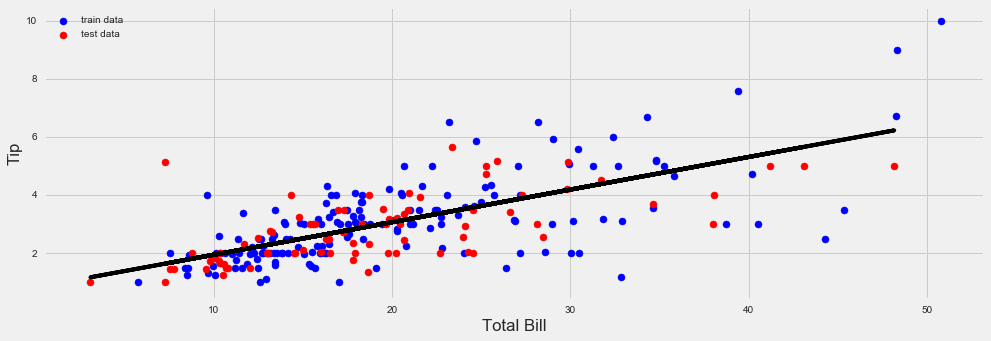

In [27]:
plt.clf()
plt.scatter(X_train, y_train, color="b", label="train data")
plt.scatter(X_test, y_test, color="r", label="test data")
plt.plot(X_test, reg.predict(X_test), color="black")
plt.legend(loc=2)
plt.xlabel("Total Bill")
plt.ylabel("Tip")

## Predicting/ Slope / Intecept / Score (r^2)

In [52]:
bill = 125.52
predTip = reg.predict([bill])[0][0]
print("Tip for a " + str(bill) + " bill should be " + str(predTip) )
print("Slope: " + str(reg.coef_[0][0]))
print("Intercept: " + str( reg.intercept_[0]))
print("Test Score (r^2): " + str(reg.score(X_test, y_test)))
print("Training Score (r^2): " + str(reg.score(X_train, y_train)))

Tip for a 125.52 bill should be 14.905021202
Slope: 0.112206997194
Intercept: 0.820798914257
Test Score (r^2): 0.399174224346
Training Score (r^2): 0.464688381508


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
